In [ ]:
!git push

# Importing and loading files.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from collections import deque
%matplotlib inline
plt.style.use('ggplot')

In [5]:
pwd

'C:\\Users\\usuario\\PFM_SAB___\\master-data-science\\PFM_SaB'

In [6]:
file='./DBs/Linkedin_searches.csv'
file_updated='./DBs/Li_research_updated_1.csv'
rcsv = pd.read_csv(file)
rcsvu= pd.read_csv(file_updated,encoding = "ISO-8859-1")
rcsvu

,Unnamed: 0,PBI_Role_List,BIM_Role,Exact_role 2017,Unprecise_role 2017,Exact_role 2018,Unprecise_role 2018,Perc,note,Column1
0,19,003.DESARROLLADOR BIM,DESARROLLADOR BIM,1,22,2,47,60,0,3
1,11,009.BIM TECHNICIAN,BIM TECHNICIAN,41,63,40,101,0,0,9
2,dEMAN,001.BIM SUPPORT,BIM SUPPORT,1,65,5,22,190,0,1
3,18,002.SOPORTE TÉCNICO BIM,SOPORTE TÉCNICO BIM,1,110,1,51,190,0,2
4,6,014.BIM MODELER,BIM MODELER,103,166,116,140,620,0,14
5,13,005.BIM DEVELOPER,BIM DEVELOPER,6,15,4,23,60,0,5
6,3,017.BIM ARCHITECT,BIM ARCHITECT,224,322,222,506,440,0,17
7,14,006.DISEÑADOR BIM,DISEÑADOR BIM,6,359,18,340,0,0,6
8,9,011.BIM COORDINATOR,BIM COORDINATOR,63,407,112,177,120,0,11
9,16,004.BIM STRUCTURES,BIM STRUCTURES,3,612,3,896,145,0,4


# DFs declaration.

In [7]:
#Let's declare working DFs and fill new aggregated entries about the total amoun of BIM profiles 
#at years 2015 and 2016 according to consultants information: 
bim_stats= rcsvu.loc[[21],['BIM_Role','Unprecise_role 2017','Unprecise_role 2018']]
bim_stats=bim_stats.transpose()
bim_stats=bim_stats.drop(['BIM_Role'])
bim2015= pd.DataFrame({'year': 'Unprecise_role 2015', 'hits': [4658]})
bim2016= pd.DataFrame({'year': 'Unprecise_role 2016', 'hits': [5892]})

roles=rcsvu.loc[:,['BIM_Role','Exact_role 2017','Unprecise_role 2017','Exact_role 2018','Unprecise_role 2018','Perc']].drop([21])
bim_stats.columns = ['hits']
bim_stats['year'] = bim_stats.index

bim_stats=bim2015.append([bim2016,bim_stats]).reset_index()
del bim_stats['index']

bim_stats=bim_stats.sort_values('hits',ascending=False)
roles=roles.sort_values('Exact_role 2018',ascending=True)

#Creamos Columna con roles y su número de orden.

def creaordercol(df):
    i=0
    newserie = pd.Series()
    alph = list(string.ascii_uppercase)
    for row in df.itertuples():      
        newserie=newserie.append(pd.Series([alph[i]+'.'+ str(row.BIM_Role)]))
        i+=1
    return newserie

BIM_rol_ord = creaordercol(roles)


roles_ord =roles.assign(BIM_rol_ord=BIM_rol_ord.values)
roles_ord




,BIM_Role,Exact_role 2017,Unprecise_role 2017,Exact_role 2018,Unprecise_role 2018,Perc,BIM_rol_ord
3,SOPORTE TÉCNICO BIM,1,110,1,51,190,A.SOPORTE TÉCNICO BIM
0,DESARROLLADOR BIM,1,22,2,47,60,B.DESARROLLADOR BIM
9,BIM STRUCTURES,3,612,3,896,145,C.BIM STRUCTURES
5,BIM DEVELOPER,6,15,4,23,60,D.BIM DEVELOPER
2,BIM SUPPORT,1,65,5,22,190,E.BIM SUPPORT
11,INGENIERO BIM,6,745,10,1321,525,F.INGENIERO BIM
7,DISEÑADOR BIM,6,359,18,340,0,G.DISEÑADOR BIM
15,ESTRUCTURAS BIM,15,1815,34,2549,145,H.ESTRUCTURAS BIM
1,BIM TECHNICIAN,41,63,40,101,0,I.BIM TECHNICIAN
20,Delineante BIM,0,0,51,1655,0,J.Delineante BIM


# Gráfica de progresión del concepto "BIM" en el mercado laboral.

Se busca en Linkedin las coincidencias en las que la palabra "BIM" se ha aplicado a los perfiles profesionales de sus usuarios. Esto nos da una aproximación de la implicación de los profesionales en las mecánicas BIM, así como la integración de estas en el mercado laboral. La búsqueda se ha realizado en el primer semestre de cada año acotando la búsqueda únicamente al mercado laboral de España.

# "BIM" concept progression at the labour market.

Se busca en Linkedin las coincidencias en las que la palabra "BIM" se ha aplicado a los perfiles profesionales de sus usuarios. Esto nos da una aproximación de la implicación de los profesionales en las mecánicas BIM, así como la integración de estas en el mercado laboral. La búsqueda se ha realizado en el primer semestre de cada año acotando la búsqueda únicamente al mercado laboral de España.

# Plotea línea de referencia de "perfiles necesarios"

In [1]:
#Barras
fig = plt.figure(figsize=(6,5))
plt.xlabel("\n Año de búsqueda de perfiles capacitados")
plt.ylabel("Nº de coincidencias búsqueda \"BIM\" ")
plt.title("EVOLUCIÓN CONCEPTO BIM EN EL MERCADO LABORAL\n")
plt.xticks(rotation=50)
x=['Lnkdn_2018','Lnkdn_2017','Lnkdn_2016','Lnkdn_2015']
y=bim_stats['hits']
pl1= plt.bar(x,y, width=-0.28, align='center',color = '#3399FF') 
#Mirar paletas de colores -> https://stackoverflow.com/questions/42656585/barplot-colored-according-a-colormap
#                            https://matplotlib.org/users/colormaps.html
plt.show()


NameError: name 'plt' is not defined

# Categorización de la masa de roles BIM y la normalización de su nomenclatura.

Conclusiones: Aún no se han normalizado los roles BIM. Tesis SAB, todos quieren ser BIM Managers y hay muy poca experiencia.

Diversificación de conceptos (consultor BIM, BIM director, delineante bim)
Aumento  concepto "BIM"
BIM Manager es una figura "gancho" Antes de emplearse, pero la industria no requiere el rol de BIM Manager, sino su conocimiento. 
Por lo que cuando se emplean dejan de ejercer el rol de BIM Manager en sentido estricto, aunque no dejen de usar sus aptitudes en el campo

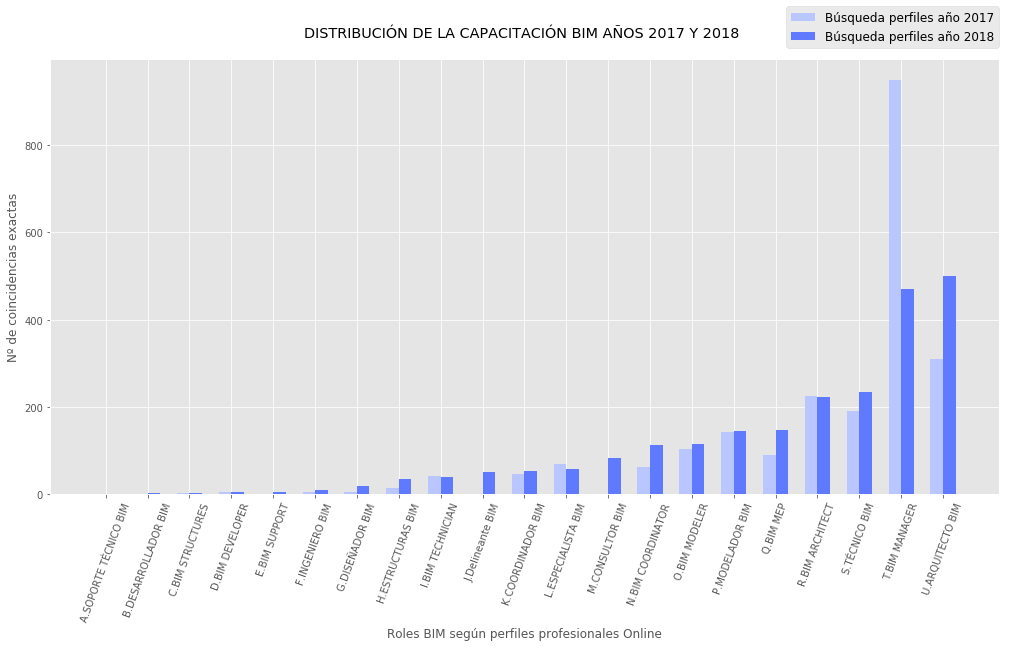

In [36]:
# (figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None)

roles_graph = roles_ord.set_index('BIM_rol_ord')
fig = plt.figure(figsize=(17,8))
plt.xlabel("Roles BIM según perfiles profesionales Online")
plt.ylabel("Nº de coincidencias exactas")
plt.title("DISTRIBUCIÓN DE LA CAPACITACIÓN BIM AÑOS 2017 Y 2018 \n")
plt.xticks(rotation=70)

x=roles_graph.index.values
y1=roles_ord['Exact_role 2017']
y2=roles_ord['Exact_role 2018']

pl1= plt.bar(x,y1, width=-0.30, align='edge',color='#BAC6FF')
pl2=plt.bar(x,y2, width=0.3, align='edge',color='#5F7AFF')

plt.legend([pl1, pl2], ["Búsqueda perfiles año 2017", "Búsqueda perfiles año 2018"],loc=0,fontsize=12,
          bbox_to_anchor=(0., 1.02, 1., .102),
           ncol=1, borderaxespad=0.)

plt.show()

In [37]:
alph = deque(list(string.ascii_uppercase))
alph.popleft()
alph.popleft()

'B'

In [6]:
roles_perc = roles_ord['Perc']
roles_demand  = pd.concat([roles_ord['BIM_Role'],roles_ord['Exact_role 2018'], roles_perc],axis=1)

#Ordenamos de nuevo las categorías según los roles requeridos 'Perc':
alph = list(string.ascii_uppercase)

bim_stats_demand = roles_demand.sort_values('Perc',ascending=False)

alph = deque(list(string.ascii_uppercase))

def alphab(stri):
    return alph.popleft()+'.'+stri
        
        
bim_stats_demand['BIM_Role']=bim_stats_demand['BIM_Role'].apply(lambda x: alphab(x))
bim_stats_demand

,BIM_Role,Exact_role 2018,Perc
4,A.BIM MODELER,116,620
13,B.MODELADOR BIM,144,620
11,C.INGENIERO BIM,10,525
18,D.ARQUITECTO BIM,501,440
6,E.BIM ARCHITECT,222,440
14,F.BIM MEP,146,365
3,G.SOPORTE TÉCNICO BIM,1,190
2,H.BIM SUPPORT,5,190
17,I.BIM MANAGER,471,170
15,J.ESTRUCTURAS BIM,34,145


# Estudio comparativo de balance de oferta y demanda de perfiles profesionales en el mercado.



Pese al evidente aumento de perfiles BIM observado en el apartado de "progresión del concepto BIM en el mercado laboral", parece la escasez de perfiles de producción y coordinación de modelos BIM así como de técnicos más orientados al desarrollo de aplicaciones y análisis de la información de los modelos es ovbia. En concreto escacea personal con experiencia en modelado 3d complejo (en su vertiente geométrica y de datos bien estructurados) y en programación de aplicaciones de automatización de comandos.

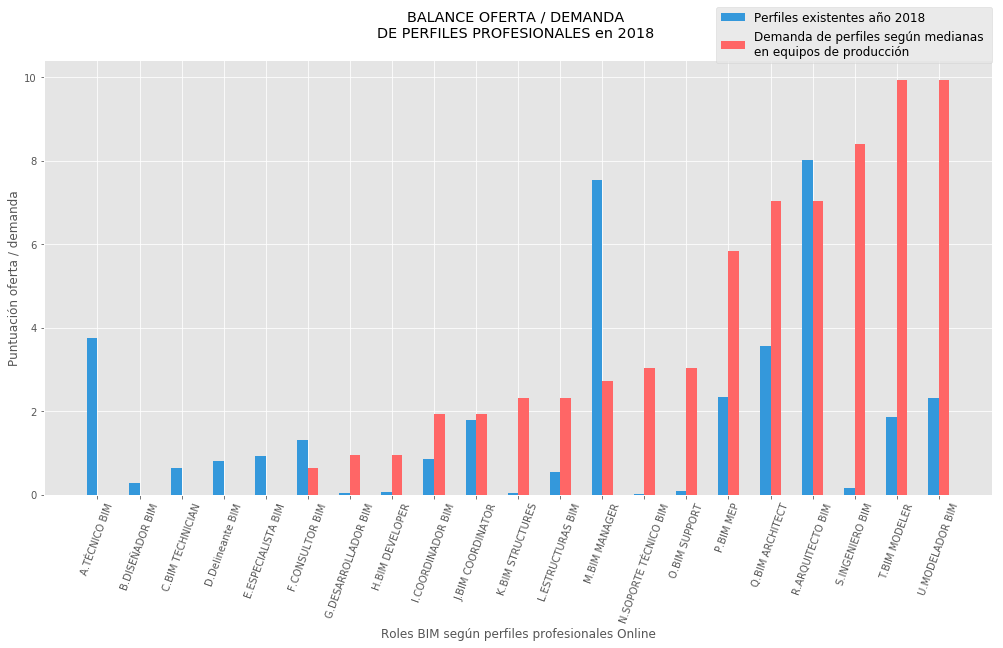

In [47]:
# Preparación del DF con nueva columna de perfiles demandados:

roles_demand  = pd.concat([roles_ord['BIM_Role'],roles_ord['Exact_role 2018'], roles_ord['Perc']],axis=1)

#Ordenamos de nuevo las categorías según los roles requeridos 'Perc':
bim_stats_demand = roles_demand.sort_values('Perc',ascending=True)

#Función asignar letra para orden de categoría en el eje.
alph = deque(list(string.ascii_uppercase))
def alphab(stri):
    return alph.popleft()+'.'+stri        
        
bim_stats_demand['BIM_Role']=bim_stats_demand['BIM_Role'].apply(lambda x: alphab(x))
bim_stats_demand

#Ploteado

fig = plt.figure(figsize=(17,8))
plt.xlabel("Roles BIM según perfiles profesionales Online")
plt.ylabel("Puntuación oferta / demanda")
plt.title("BALANCE OFERTA / DEMANDA \nDE PERFILES PROFESIONALES en 2018 \n")
plt.xticks(rotation=70)

x=bim_stats_demand['BIM_Role']
y1=bim_stats_demand['Exact_role 2018']*0.016
y2=bim_stats_demand['Perc']*0.016

pl2=plt.bar(x,y2, width=0.25, align='edge',color='#ff6666')
pl1= plt.bar(x,y1, width=-0.25, align='edge',color='#3498db')


plt.legend([pl1, pl2], ["Perfiles existentes año 2018", "Demanda de perfiles según medianas \nen equipos de producción"],loc=0,fontsize=12,
          bbox_to_anchor=(0., 1.02, 1., .102),
           ncol=1, borderaxespad=0.)

plt.show()

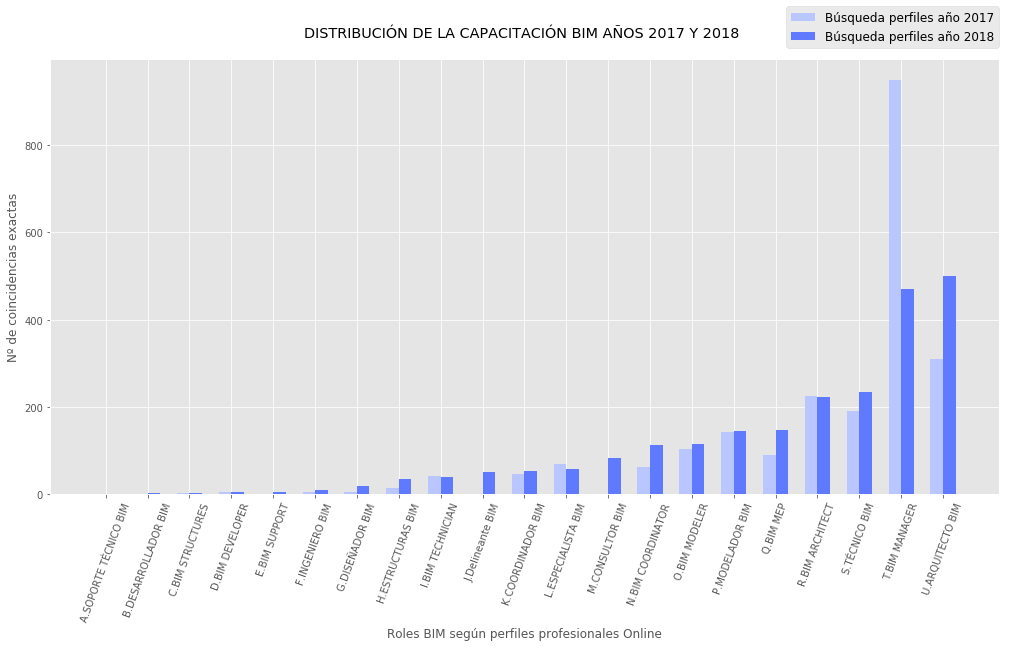

In [7]:
# (figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None)

roles_graph = roles_ord.set_index('BIM_rol_ord')
fig = plt.figure(figsize=(17,8))
plt.xlabel("Roles BIM según perfiles profesionales Online")
plt.ylabel("Nº de coincidencias exactas")
plt.title("DISTRIBUCIÓN DE LA CAPACITACIÓN BIM AÑOS 2017 Y 2018 \n")
plt.xticks(rotation=70)

x=roles_graph.index.values
y1=roles_ord['Exact_role 2017']
y2=roles_ord['Exact_role 2018']

pl1= plt.bar(x,y1, width=-0.30, align='edge',color='#BAC6FF')
pl2=plt.bar(x,y2, width=0.3, align='edge',color='#5F7AFF')

plt.legend([pl1, pl2], ["Búsqueda perfiles año 2017", "Búsqueda perfiles año 2018"],loc=0,fontsize=12,
          bbox_to_anchor=(0., 1.02, 1., .102),
           ncol=1, borderaxespad=0.)

plt.show()

# Crea nuevas columnas en el DF con la proyección de perfiles año a año y haz un slider para proyectar la evolución en referencia a la puntuación de demanda por perfil. BUSCAR SLIDER O INTERACTIVE MATPLOTLIB.

# Conclusiones evolución de la masa de profesionales especializados en BIM

Se analizarían tres categorías, coincidencias con término de búsqueda relativo en 2017 y en 2018 y requerimientos de mercado.
Para requerimientos de mercado sumaremos el total de técnicos representado en el año 2018 y le aplicaremos un porcentaje de técnicos que estimamos necesarios según nuestras experiencias y trabajos.
Ya que de base, este estudio no está basado en los roles sugeridos por diversas normativas BIM propuestas, sino frecuentemente en la "autoasignación" arbitraria de un rol por cada individuo en las redes sociales, hemos hecho una valoración de la utilidad real de dichos roles. Desestimamos algunos términos (no aplicándoles un porcentaje)que consideramos aplicados por profesionales según sus sircunstancias específicas de empresa o por modas no atadas a ningún rigor productivo. 

En el último gráfico se aprecia la aparente gran cantidad de gestores BIM que hay en el mercado. Hay varias lecturas de este fenómeno que no son excluyentes entre ellas. (Buscar libro)



Hay grandes portunidades actualmente de trabajar como modelador en proyetos complejos para adquirir la experiencia que permitirá conocer y depurar los estándares BIM del futuro, que serán a todas luces más exigentes que los actuales. Los que intentan comenzar como BIM Managers desde el minuto uno puede servirles a corto plazo, pero sin experiencia ni conocimiento real de los software será muy difícil que puedan mantener con solvencia dicho rol a lo largo de los años en comparación con profesionales que se habrán enfrentado a los problemas reales del BIM, sis estándares y sus contratiempos.